In [55]:
import pandas as pd

#### 데이터 불러오기

In [56]:
train = pd.read_csv("titanic/train.csv")
test = pd.read_csv("titanic/test.csv")

#### 데이터 분석

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S



#### Data Dictionary
- Survived: 0 = No, 1 = Yes
- pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- sibsp: # of siblings / spouses aboard the Titanic
- parch: # of parents / children aboard the Titanic
- ticket: Ticket number
- cabin: Cabin number
- embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [57]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [6]:
train.info() # 정보 보기
# Age 정보가 비여 있는 것을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info() # Age, cabin 정보 몇개가 빠진 것을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
# null값으로 확인
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### 시각화 하기

In [10]:
import matplotlib.pyplot as  plt
import seaborn as sns
sns.set()

In [11]:
# 함수로 정의 

def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

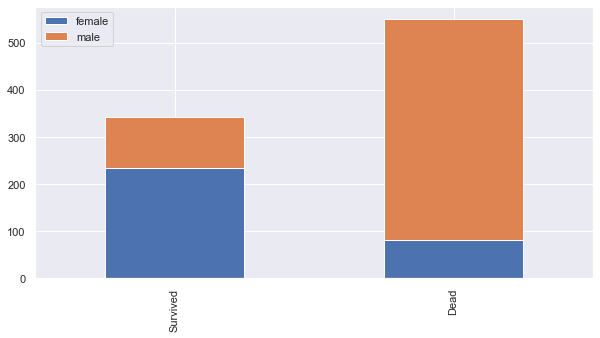

In [12]:
# 성별에 따른 생사 확인
# 여자가 남자보다 살 확률이 높다고 볼 수 있다.

bar_chart("Sex")

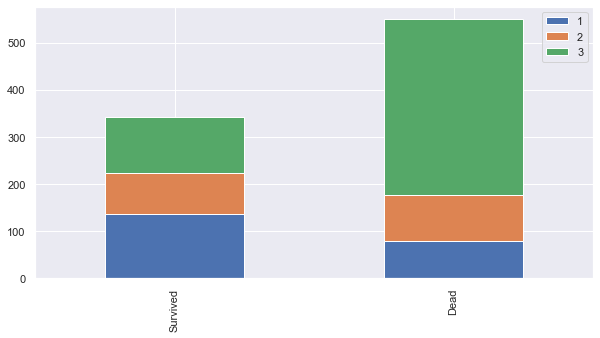

In [13]:
# 등급에 따라서 생사 확률 다름을 알 수 있다.
# 
bar_chart('Pclass')

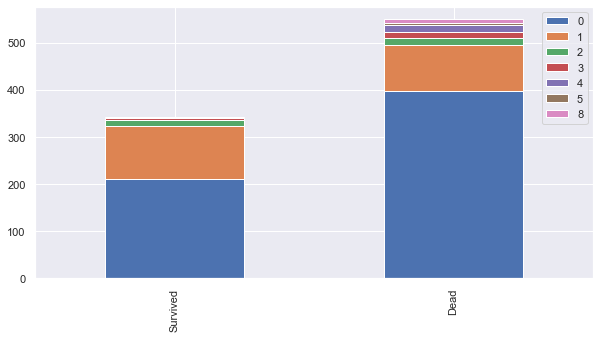

In [14]:
bar_chart('SibSp')

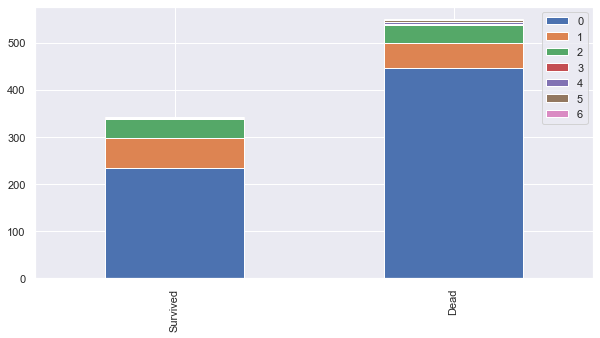

In [15]:
# 가족 동행 여부에 따른 생사 
bar_chart('Parch')

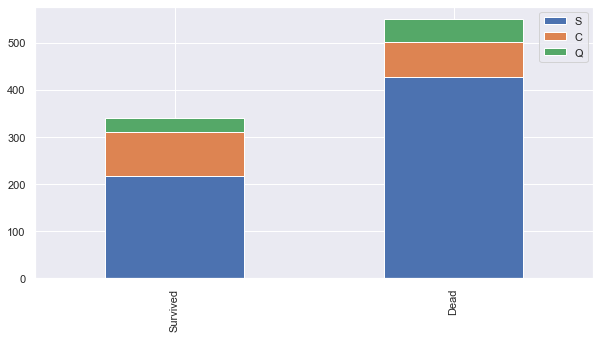

In [16]:
# 탐승한 곳에 따른 생사

bar_chart("Embarked")

### 데이터 전처리

#### Name 전처리

In [58]:
# Name
# Mr, MIss, Mrs, ...
train_test_data = [train, test] # 데이터 합치기
for dataset in train_test_data:
    dataset["Title"] = dataset["Name"].str.extract('([A-Za-z]+)\.',
                                                   expand=False)


In [59]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Countess      1
Ms            1
Lady          1
Don           1
Sir           1
Mme           1
Jonkheer      1
Capt          1
Name: Title, dtype: int64

In [60]:
# Title map

title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3,
                 "Mlle": 3,"Countess": 3,"Ms": 3, "Lady": 3, "Jonkheer": 3,
                 "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset["Title"] = dataset['Title'].map(title_mapping)

In [61]:
train.head() # Title이란 컬럼이 생김

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [62]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [63]:
# Name 컬럼 삭제
train.drop('Name', axis=1, inplace=True) 
test.drop('Name', axis=1, inplace=True)

#### Sex 전처리

In [64]:
# 성별을 숫자로 바꿔 주기
# male:0, female:1 로 바꿔 주기

sex_mapping = {"male":0, "female":1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

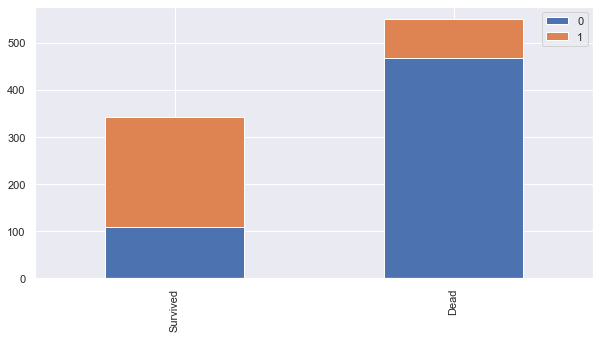

In [65]:
# 성별에 따른 생사

bar_chart("Sex")

#### Age 전처리

In [66]:
# Age에는 null값이 존재하기에 Null값을 평균값이나 다른 값으로 먼저 채워야 함
# Age를 Mr, Mrs, Miss, Others의 평균값으로 채움

train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), 
                    inplace=True)
test['Age'].fillna(train.groupby('Title')['Age'].transform('median'), 
                    inplace=True)
# Title별로 정렬하여 Age의 null값을 median으로 채우기

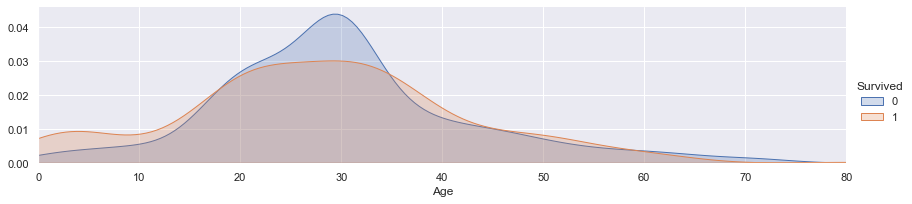

In [67]:
# 나이에 따른 생사 확인

facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()

(0.0, 20.0)

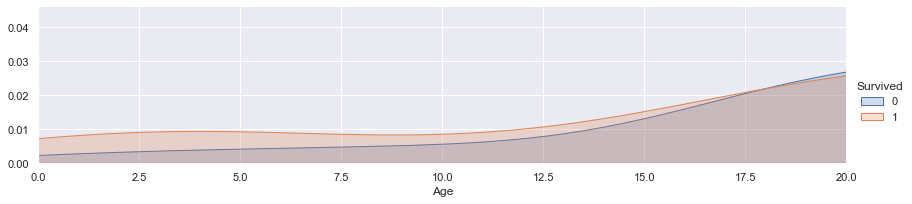

In [68]:
# 나이 0 ~ 20 사이를 크게 보기

facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0,20)

In [69]:
# Age를 나이대 별로 구분하기
# Bining

for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

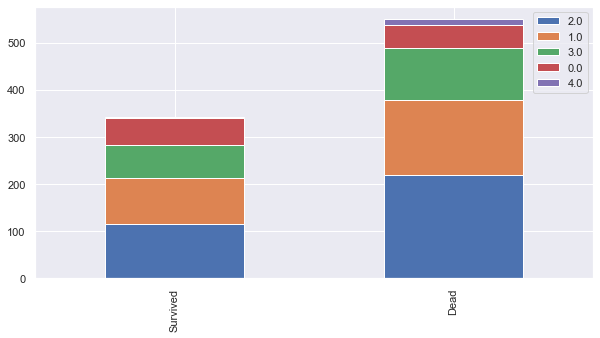

In [70]:
# 막대 그래프로 생사 확인

bar_chart("Age")

#### Embarked 전처리

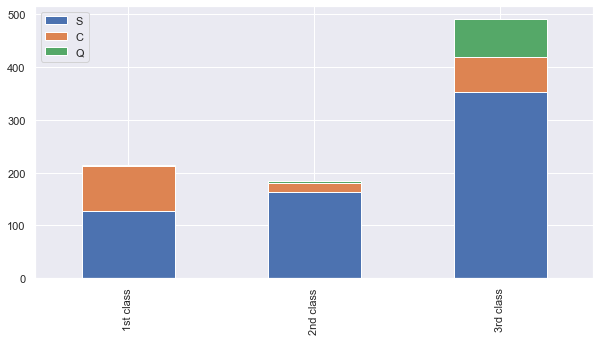

In [71]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])

df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

# Q에서 탄 사람은  3등급에는 조금 있고 1등급에는 거의 없음을 알 수 있다.
# Embarked 정보가 null이면 그것을 S로 채워도 무방함을 볼 수 있다.

In [72]:
# null값을 S로 채우기

for datase in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [74]:
# 텍스트 되어 있는 것을 숫자로 바꿔주기

embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [75]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0.0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1.0,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0.0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0.0,0


#### Fare 전처리

In [76]:
# Fare의 null값은 Pclass별로 median값으로 채우기
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform('median'),
                           inplace=True)
                           
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform('median'),
                           inplace=True)

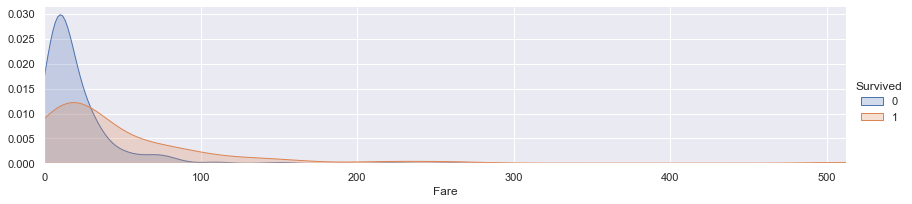

In [77]:
# Fare에 따른 생사 확인

facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()

In [78]:
# 요금대별로 구분

for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [79]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0.0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1.0,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0.0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0.0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0.0,0


#### Cabin 전처리

In [80]:
# Cabin :방번호
train.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F2             3
C22 C26        3
              ..
D19            1
D30            1
B82 B84        1
C118           1
B78            1
Name: Cabin, Length: 147, dtype: int64

In [81]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

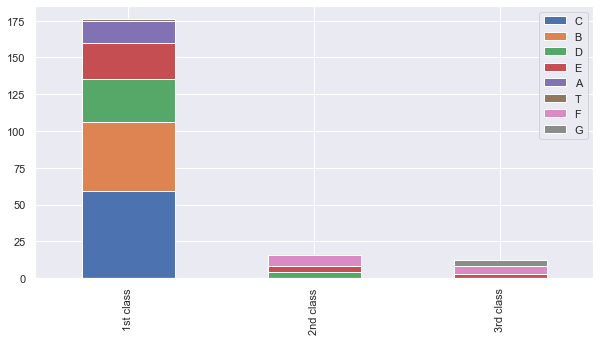

In [82]:
# 막대 그래프로 생사 확인

Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [83]:
# 알파벳으로 구분하여 숫자로 바꿔주기
# 소수점 사용한 이유는 숫자들의 차이를 줄이기 위해서

cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6,
                 "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [84]:
# Pclass별로 median값을 null에 채우기

train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), 
                      inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), 
                     inplace=True)

#### FamilySize 전처리

In [85]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0.0, 11.0)

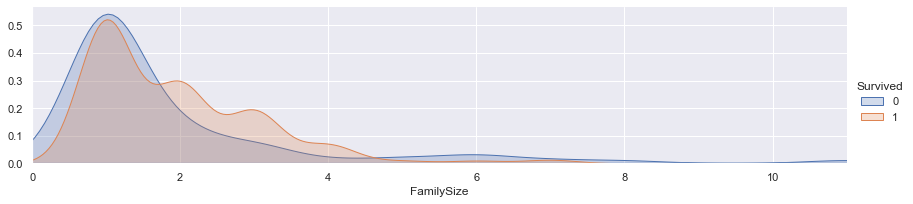

In [86]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [87]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [88]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [89]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [90]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0.0,0,0.4
1,1,1,3.0,2.0,0.8,1.0,2,0.4
2,3,1,1.0,0.0,2.0,0.0,1,0.0
3,1,1,2.0,2.0,0.8,0.0,2,0.4
4,3,0,2.0,0.0,2.0,0.0,0,0.0


### 모델링

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

#### Cross Validation(K-fold)

In [92]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

#### SVC

In [94]:

clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[nan nan nan nan nan nan nan nan nan nan]


C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 160, in fit
    X, y = self._validate_data(X, y, dtype=np.float64,
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 796, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  File "C:\Users\U

In [52]:
round(np.mean(score)*100, 2)

nan

In [ ]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [ ]:

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [ ]:
submission.head()